In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('House/train.csv')

In [3]:
test = pd.read_csv('House/test.csv')

In [39]:
y_test = pd.read_csv('House/sample_submission.csv')

In [5]:
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)



In [40]:
y_test.set_index('Id', inplace=True)

In [7]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [9]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
na = train.isna().sum()
na[na>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
train = train.drop(['Alley','PoolQC', 'Fence','MiscFeature'], axis=1)
test = test.drop(['Alley','PoolQC', 'Fence','MiscFeature'], axis=1)

In [12]:
na = train.isna().sum()
na[na>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [13]:
train = train.drop(['FireplaceQu','MasVnrType', 'LotFrontage'], axis=1)
test = test.drop(['FireplaceQu','MasVnrType', 'LotFrontage'], axis=1)

In [14]:
na = train.isna().sum()
na[na>0]

MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [15]:
na = test.isna().sum()
na[na>0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [16]:
train = train.dropna()


In [17]:
test = test.dropna()


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 1 to 1460
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  Condition2     1338 non-null   object 
 12  BldgType       1338 non-null   object 
 13  HouseStyle     1338 non-null   object 
 14  OverallQual    1338 non-null   int64  
 15  OverallCond    1338 non-null   int64  
 16  YearBuilt      1338 non-null   int64  
 17  YearRemodAdd   1338 non-null   int64  
 18  RoofStyle    

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 1461 to 2919
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1320 non-null   int64  
 1   MSZoning       1320 non-null   object 
 2   LotArea        1320 non-null   int64  
 3   Street         1320 non-null   object 
 4   LotShape       1320 non-null   object 
 5   LandContour    1320 non-null   object 
 6   Utilities      1320 non-null   object 
 7   LotConfig      1320 non-null   object 
 8   LandSlope      1320 non-null   object 
 9   Neighborhood   1320 non-null   object 
 10  Condition1     1320 non-null   object 
 11  Condition2     1320 non-null   object 
 12  BldgType       1320 non-null   object 
 13  HouseStyle     1320 non-null   object 
 14  OverallQual    1320 non-null   int64  
 15  OverallCond    1320 non-null   int64  
 16  YearBuilt      1320 non-null   int64  
 17  YearRemodAdd   1320 non-null   int64  
 18  RoofStyle 

In [20]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1338.0,56.136024,41.252576,20.0,20.00,50.0,70.00,190.0
LotArea,1338.0,10706.294469,10336.621126,1300.0,7744.00,9600.0,11760.75,215245.0
OverallQual,1338.0,6.219731,1.324472,2.0,5.00,6.0,7.00,10.0
OverallCond,1338.0,5.596413,1.078124,2.0,5.00,5.0,6.00,9.0
YearBuilt,1338.0,1973.029148,29.563540,1880.0,1956.00,1976.0,2001.00,2010.0
YearRemodAdd,1338.0,1985.668909,20.296463,1950.0,1968.00,1994.5,2004.00,2010.0
MasVnrArea,1338.0,110.360239,185.604816,0.0,0.00,0.0,174.00,1600.0
BsmtFinSF1,1338.0,464.234679,458.792420,0.0,0.00,413.0,733.00,5644.0
BsmtFinSF2,1338.0,49.218236,166.196584,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1338.0,582.494768,439.950528,0.0,248.00,489.0,815.75,2336.0


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt



In [22]:
df = pd.get_dummies(train)

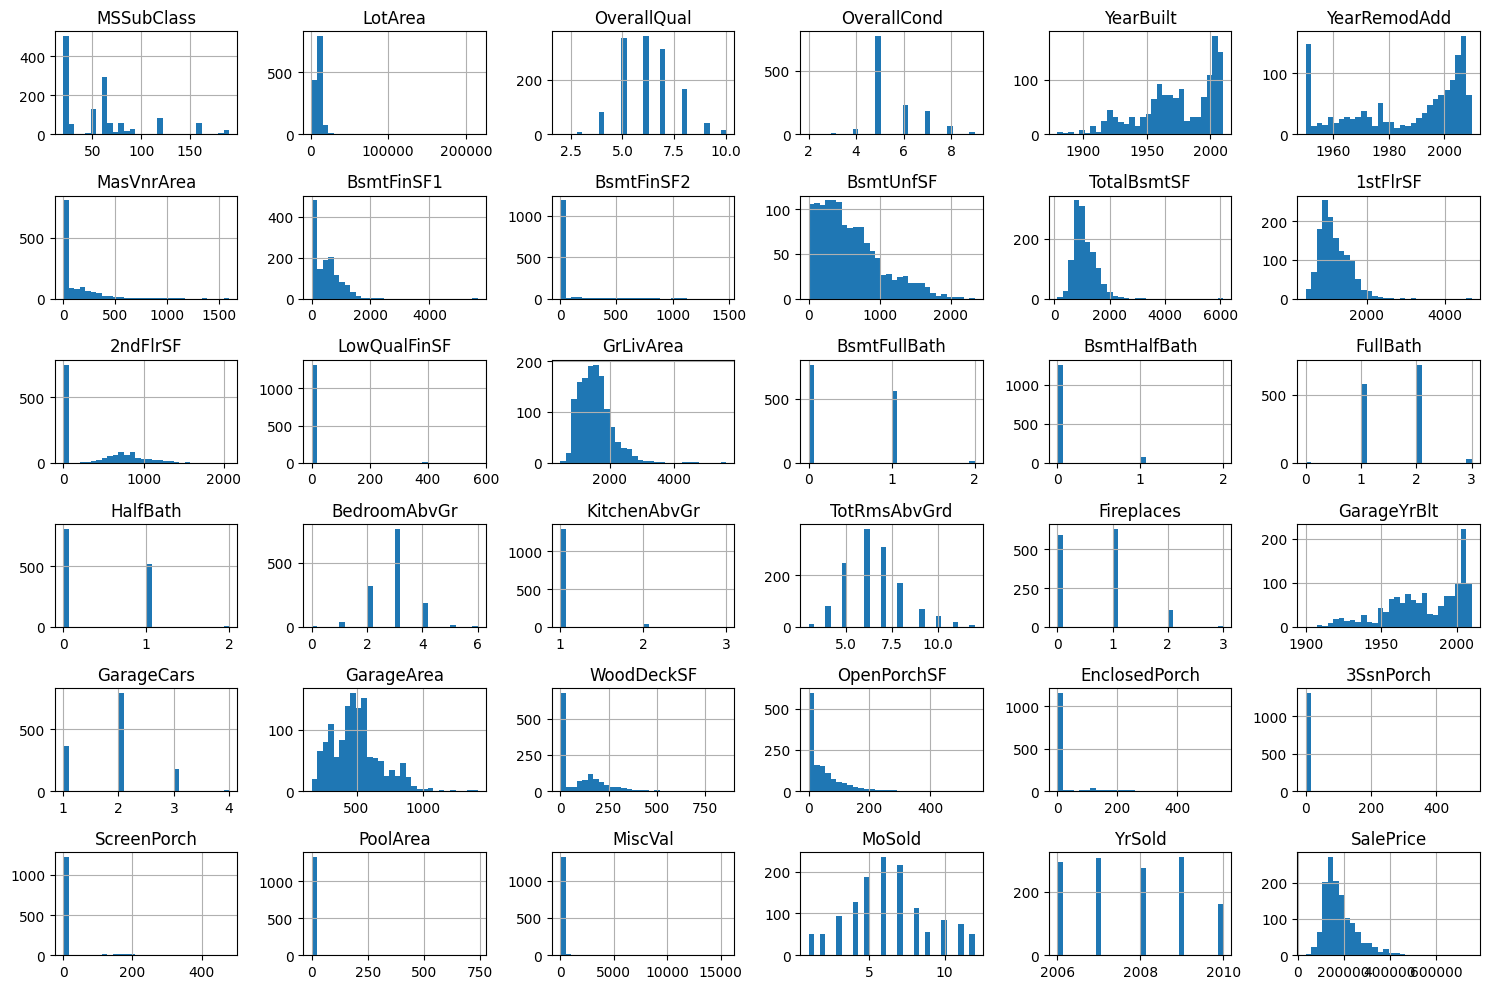

In [23]:
df.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
from sklearn.compose import ColumnTransformer

Scaler = StandardScaler()

In [27]:
X = train.drop('SalePrice', axis=1)

In [28]:
y = train['SalePrice']

In [158]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [31]:
from sklearn.pipeline import Pipeline

In [41]:
y_test = y_test[y_test.index.isin(test.index)]

In [42]:
y_test

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977
...,...
2912,188506.431412
2913,172917.456816
2916,164788.778231


In [118]:
def model_run(X,y, model,test, preprocessor):
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model) 
                                ])
    pipeline.fit(X,y)
    predictions = pipeline.predict(test)
    
    mae = mean_absolute_error(y_test, predictions)
    print(model, 'MAE: ', mae)
    mse = mean_squared_error(y_test, predictions)
    print(model, 'RMSE: ', np.sqrt(mse))

    

In [44]:
model_run(X,y, LinearRegression(),test, preprocessor)

LinearRegression() MAE:  55988.01355937786
LinearRegression() RMSE:  76431.07303168843


In [113]:
models = (LinearRegression(),LinearSVR(), DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), RandomForestRegressor())

In [46]:
for model in models:
    model_run(X,y, model,test, preprocessor)

LinearSVR() MAE:  145293.95719239517
LinearSVR() RMSE:  146156.07192934953
DecisionTreeRegressor() MAE:  56249.21505207489
DecisionTreeRegressor() RMSE:  77476.90168439718
KNeighborsRegressor() MAE:  48374.803410353525
KNeighborsRegressor() RMSE:  62533.13679427575
AdaBoostRegressor() MAE:  49910.91716799473
AdaBoostRegressor() RMSE:  68773.67140004288
GradientBoostingRegressor() MAE:  52945.35100448872
GradientBoostingRegressor() RMSE:  72547.6631420558
RandomForestRegressor() MAE:  51759.5228828646
RandomForestRegressor() RMSE:  69671.86118797133


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_estimators': [50,100,150],
              'max_depth':[None, 10, 20, 30, 40, 50]
             }

In [175]:
grid_model =GridSearchCV(RandomForestRegressor(),
                          param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                         scoring='neg_mean_squared_error',
                              cv=5,
                              n_jobs=-1,
                              verbose=2
                            )

SyntaxError: keyword argument repeated: scoring (3761092787.py, line 4)

In [50]:
model_run(X,y, grid_model, test, preprocessor)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error') MAE:  51650.21715039776
GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error') RMSE:  69763.08437099376


In [51]:
 pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', grid_model)])
predictions = pipeline.predict(test)

In [52]:
grid_model.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [53]:

mae = mean_absolute_error(y_test, predictions)
print(model, 'MAE: ', mae)
mse = mean_squared_error(y_test, predictions)
print(model, 'RMSE: ', np.sqrt(mse))
    

RandomForestRegressor() MAE:  51650.21715039776
RandomForestRegressor() RMSE:  69763.08437099376


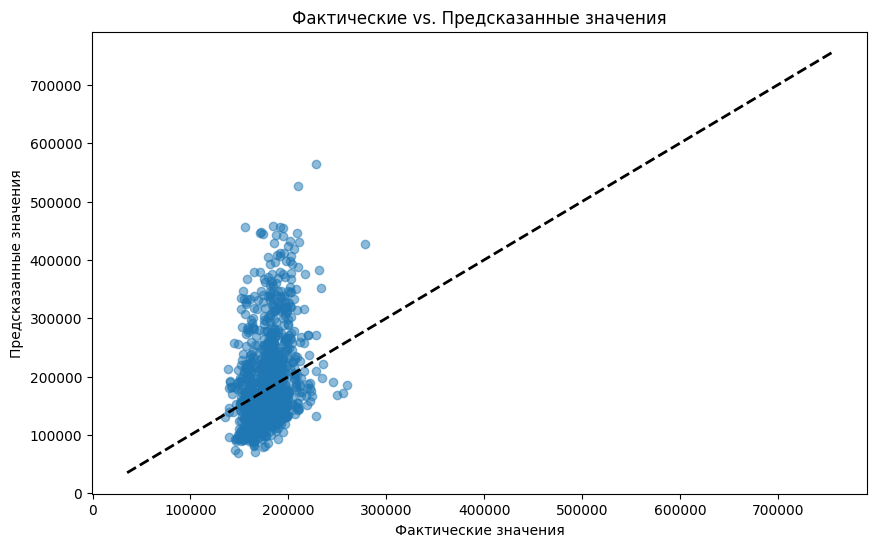

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs. Предсказанные значения")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

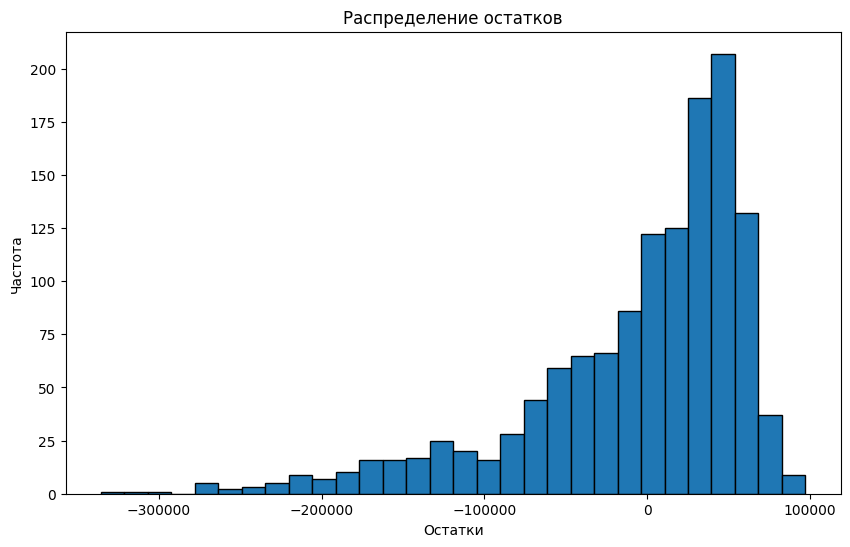

In [56]:
residuals = y_test['SalePrice'] - predictions

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.title("Распределение остатков")
plt.show()

In [97]:
numeric_features_list = numeric_features.tolist()
columns_to_select = ['SalePrice'] + numeric_features_list

In [100]:
corr_matrix = train[columns_to_select].corr()
corr_with_price = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
print(corr_with_price.head(10))

SalePrice       1.000000
OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
Name: SalePrice, dtype: float64


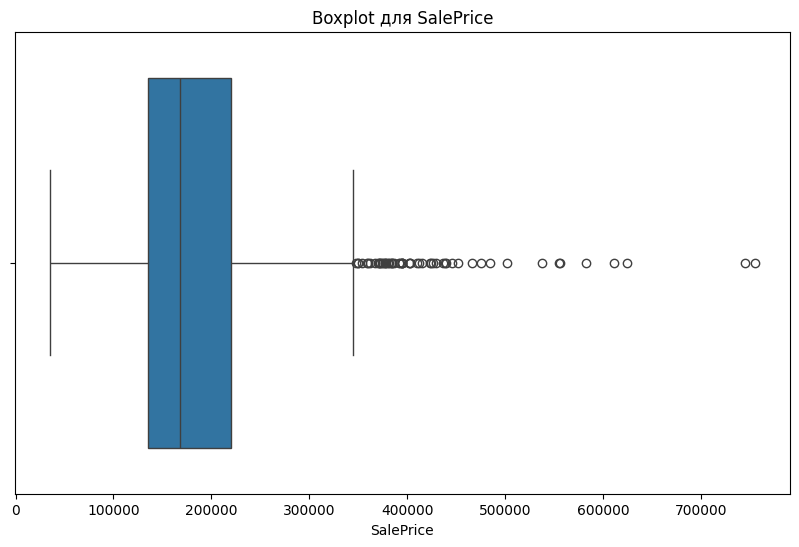

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y)
plt.title('Boxplot для SalePrice')
plt.xlabel('SalePrice')
plt.show()

In [103]:
train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [104]:
train['SalePrice_log'] = np.log1p(train['SalePrice'])


In [105]:
train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,12.247699
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,12.109016
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,12.317171
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849405
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,8,2007,WD,Normal,175000,12.072547
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,2,2010,WD,Normal,210000,12.254868
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,2500,5,2010,WD,Normal,266500,12.493133


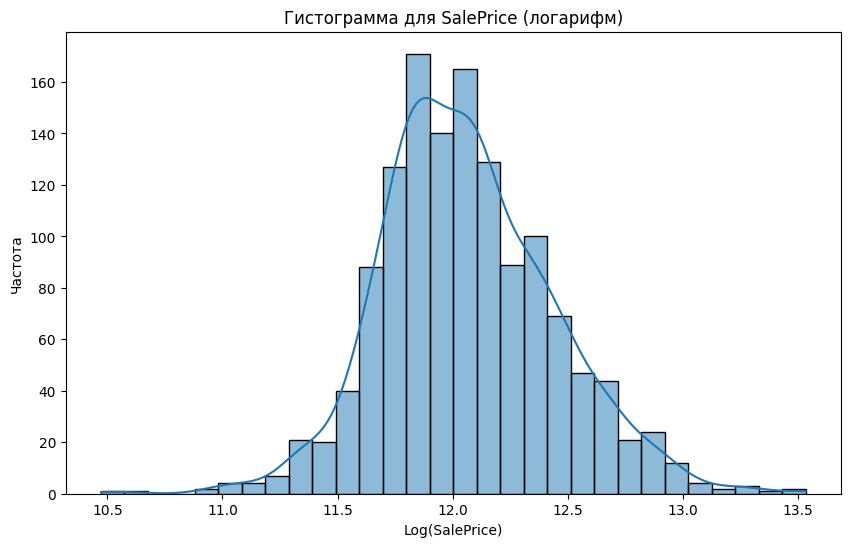

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice_log'], bins=30, kde=True)
plt.title('Гистограмма для SalePrice (логарифм)')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Частота')
plt.show()

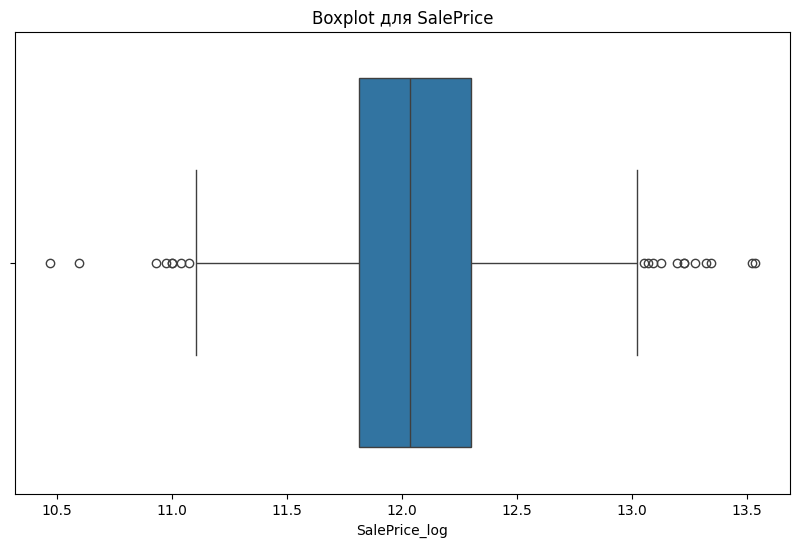

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['SalePrice_log'])
plt.title('Boxplot для SalePrice')
plt.xlabel('SalePrice_log')
plt.show()

In [154]:
X = train.drop(['SalePrice', 'SalePrice_log', 'OverallQual'], axis=1)

In [155]:
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal


In [151]:
test = test.drop('OverallQual', axis=1)

KeyError: "['OverallQual'] not found in axis"

In [111]:
y_train_log = train['SalePrice_log']

In [112]:
model_run(X,y_train_log, grid_model, test, preprocessor)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error') MAE:  178972.19742663743
GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error') RMSE:  179669.3345303281


In [114]:
models = (LinearRegression(),LinearSVR(), DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), RandomForestRegressor())

In [126]:
def model_run_log(X,y, model,test, preprocessor):
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model) 
                                ])
    pipeline.fit(X,y)
    predictions = pipeline.predict(test)
    predictions = np.expm1(predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(model, 'MAE: ', mae)
    mse = mean_squared_error(y_test, predictions)
    print(model, 'RMSE: ', np.sqrt(mse))

    

In [162]:
for model in models:
    model_run_log(X,y_train_log, model,test, preprocessor)

LinearRegression() MAE:  55810.60022377376
LinearRegression() RMSE:  86688.2216730798


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR() MAE:  53246.18090330666
LinearSVR() RMSE:  88595.53492085332
DecisionTreeRegressor() MAE:  56095.08134248759
DecisionTreeRegressor() RMSE:  79704.59370966964
KNeighborsRegressor() MAE:  48028.621260382926
KNeighborsRegressor() RMSE:  61359.31727534145
AdaBoostRegressor() MAE:  52550.14611052848
AdaBoostRegressor() RMSE:  65332.35442477484
GradientBoostingRegressor() MAE:  52304.09990612718
GradientBoostingRegressor() RMSE:  70022.88678600603
RandomForestRegressor() MAE:  50366.15640197187
RandomForestRegressor() RMSE:  66341.43149149485


In [160]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [161]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces'...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

In [173]:
model_run_log(X,y_train_log, grid_model, test, preprocessor)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error') MAE:  50829.995574544366
GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error') RMSE:  67194.87778000424


In [189]:
param_grid_KNN = {'n_neighbors': [3, 5, 7, 9, 11, 13],
                    'weights': ['uniform', 'distance'],
                    'p': [1, 2],
                  'metric': ['minkowski', 'euclidean', 'manhattan']
             }

In [190]:
grid_model_KNN = GridSearchCV(KNeighborsRegressor(),
                          param_grid=param_grid_KNN,
                        scoring='neg_mean_squared_error',
                              cv=5,
                              n_jobs=-1,
                              verbose=2
                            )

In [178]:
grid_model.best_params_

{'max_depth': None, 'n_estimators': 100}

In [191]:
model_run_log(X,y_train_log, grid_model_KNN, test, preprocessor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2) MAE:  49723.33732060652
GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2) RMSE:  64101.82747392144


In [193]:
grid_model_KNN.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [283]:
median = numeric_features['SalePrice'].median()
train['SalePrice'] = np.where(train['SalePrice'] > upper_bound, median, train['SalePrice'])
train['SalePrice'] = np.where(train['SalePrice'] < lower_bound, median, train['SalePrice'])


In [202]:
train[columns_to_select]['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1338, dtype: int64

In [205]:
Q1 = train[columns_to_select]['SalePrice'].quantile(0.25)
Q3 = train[columns_to_select]['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [214]:
outliers_iqr = train[columns_to_select][(train[columns_to_select]['SalePrice'] < lower_bound) | (train[columns_to_select]['SalePrice'] > upper_bound)]
print(f"Количество выбросов по IQR: {outliers_iqr.shape[0]}")

Количество выбросов по IQR: 0


In [213]:
# Предположим, что median вычислен как медиана колонки 'SalePrice'
median = train['SalePrice'].median()

# Замена значений выше верхней границы
train.loc[train['SalePrice'] > upper_bound, 'SalePrice'] = median

# Замена значений ниже нижней границы
train.loc[train['SalePrice'] < lower_bound, 'SalePrice'] = median


In [216]:
X = train.drop(['SalePrice', 'SalePrice_log', 'OverallQual'], axis=1)

In [217]:
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal


In [220]:
model_run(X,y, grid_model_KNN, test, preprocessor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2) MAE:  41114.45891414579
GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2) RMSE:  47014.70714881935


In [221]:
model_run(X,y, grid_model, test, preprocessor)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error') MAE:  39259.35655244906
GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error') RMSE:  45874.342333452005


In [226]:
print(np.sqrt( -grid_model_KNN.best_score_))

31067.14834766527


In [227]:
print(np.sqrt( -grid_model.best_score_))

28465.442952430887


In [256]:
 pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', grid_model)])
predictions_grid = pipeline.predict(test)

In [257]:
predictions_grid

array([120182.08952381, 154831.61      , 186555.        , ...,
        88801.5       , 152221.48      , 219837.63666667])

In [258]:
 pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', grid_model_KNN)])
predictions_KNN = pipeline.predict(test)

In [259]:
predictions_KNN

array([120337.75752862, 145147.81599302, 181809.11268972, ...,
        94134.4977168 , 134626.97967763, 212558.4011855 ])

In [266]:
residuals_grid = y_test['SalePrice'] - predictions_grid


In [270]:
from sklearn.metrics import mean_absolute_percentage_error

In [272]:
mean_absolute_percentage_error(y_test, predictions_grid) * 100

np.float64(22.141904404142547)

In [267]:
residuals_KNN = y_test['SalePrice'] - predictions_KNN

In [273]:
mean_absolute_percentage_error(y_test, predictions_KNN) * 100

np.float64(23.10255303078943)

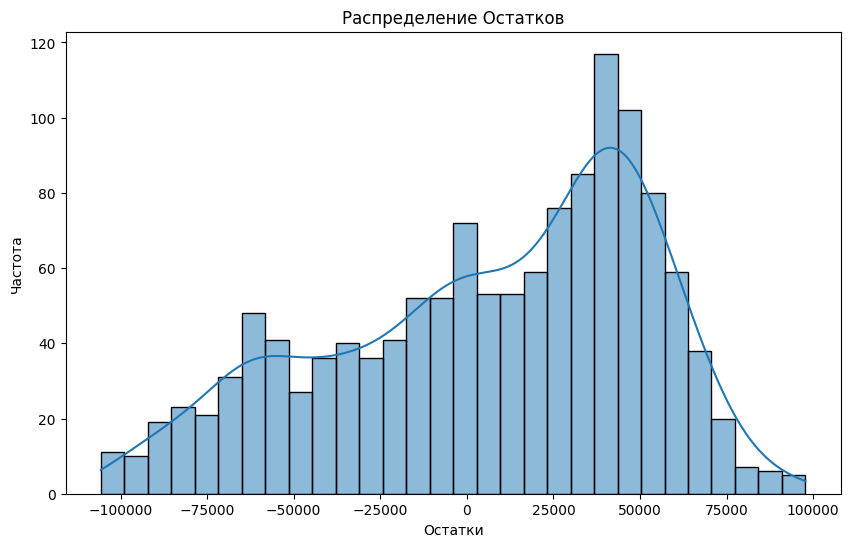

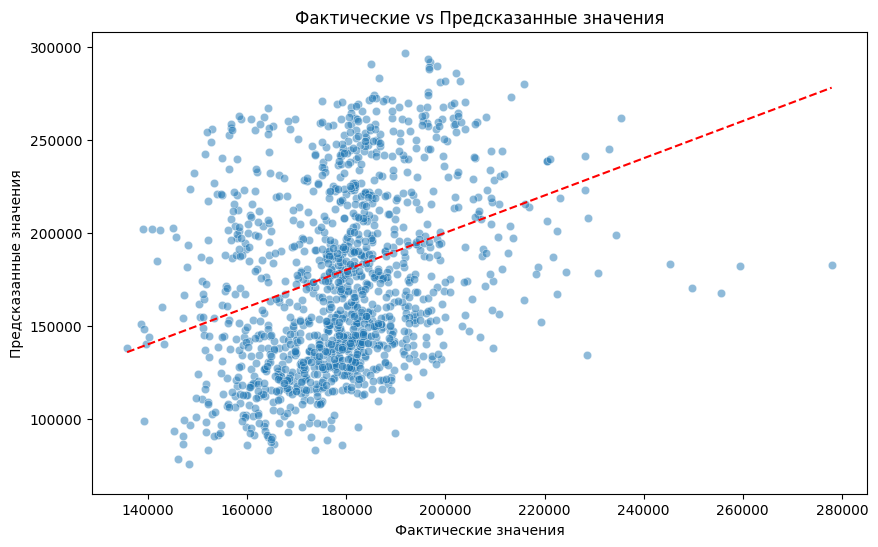

In [268]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_grid, bins=30, kde=True)
plt.title('Распределение Остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Scatter Plot: Фактические vs Предсказанные значения
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test['SalePrice'], y=predictions_grid, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Линия идеальных предсказаний
plt.title('Фактические vs Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()

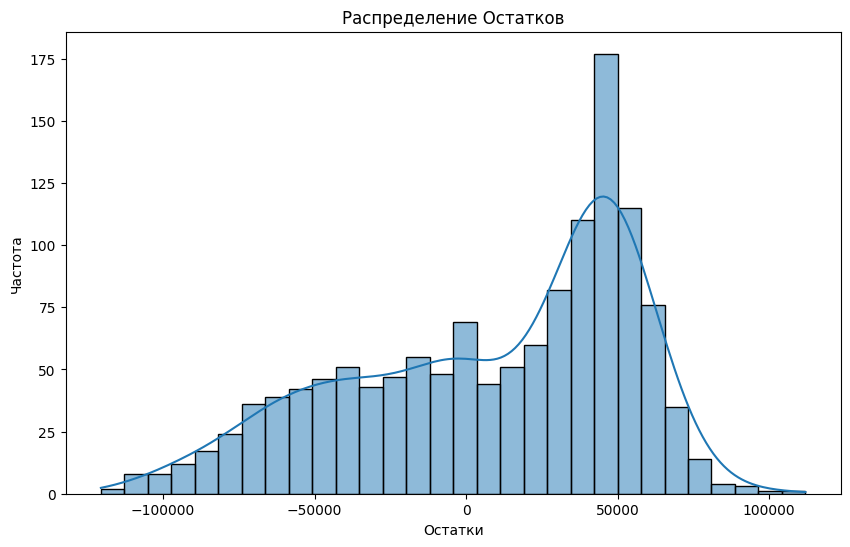

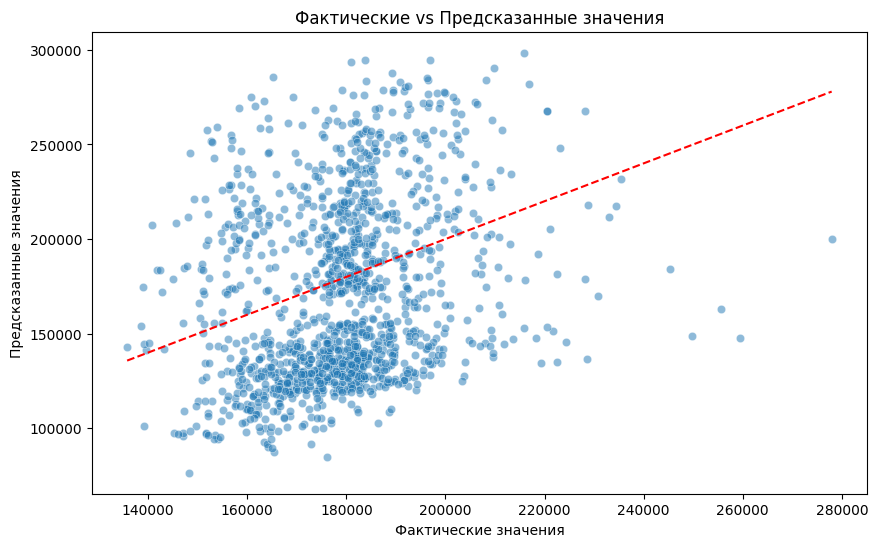

In [269]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_KNN, bins=30, kde=True)
plt.title('Распределение Остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Scatter Plot: Фактические vs Предсказанные значения
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test['SalePrice'], y=predictions_KNN, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Линия идеальных предсказаний
plt.title('Фактические vs Предсказанные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.show()

In [279]:
print(round(100- mean_absolute_percentage_error(y_test, predictions) * 100),'%  accuracy')

77 %  accuracy
